# Three-Phase Method
From David Geisler-Moroder: *BSDF generation and use in annual, matrix-based daylight simulations with Radiance*, [RADIANCE workshop 2019](https://www.radiance-online.org/community/workshops/2019-new-york-ny)
![blabla](Images/ThreePhaseMethodOverview.png)



## Laden der notwendigen Packete
`pyradiance`: https://github.com/hella-innoLab/pyradiance from https://github.com/LBNL-ETA/pyradiance
enthält python ausführbare Funktionen der RADIANCE Code Sammlung

`os`:provides functions for interacting with the operating system.

In [50]:
import sys, os
import pyradiance as pr
import subprocess as sp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyradiance.anci import BINPATH

## View matrix

![test](Images/3PM_VMX.png)

![test](Images/VMX_method.png)

[Text(0.5, 0, 'x (m)'), Text(0.5, 0.5, 'y (m)'), Text(0.5, 0, 'height (m)')]

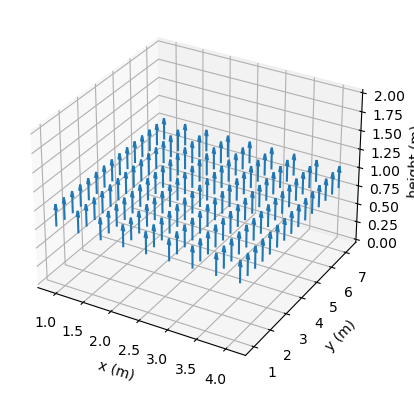

In [68]:
'''
here, the view matrix is calculated for a pre-defined set of points in the room
each point is defined by its location (x,y,z) and view direction (vx,vy,vz)
e.g., these point are the locations of illuminance sensors
''' 
receiver_file_path = Path(r"files/pts/tutorial_workplane.pts")

receiver_points = pd.read_csv(receiver_file_path, header=None, delim_whitespace=True)

# plot of the points
x, y, z = receiver_points[0].values, receiver_points[1].values, receiver_points[2].values
vx, vy, vz = receiver_points[3].values, receiver_points[4].values, receiver_points[5].values

ax = plt.figure().add_subplot(projection='3d')

ax.quiver(x, y, z, vx, vy, vz, length=0.3) #quiver length 0.3 m 
ax.set(zlim = [0,2])
ax.set(xlabel = "x (m)", ylabel = "y (m)", zlabel = "height (m)")

In [71]:
# get number of available CPUs in the system
nprocs = os.cpu_count()

# calculate the view matrix from the window to a illuminance sensor
sender_file_path = Path(r"files/scene/tutorial_window_vmx_glow.rad")
scene_file_path = Path(r"files/scene/tutorial_room_3pm.rad")
vmx_file_path = Path(r"files/matrices/tutorial_room_3pm_sensors_temp.vmx")


rcopts = f"-V- -n {nprocs-2} -w- -I+ -ab 5 -ad 65536 -lw 1.0e-6 -faa"
cmd = f"rfluxmtx {rcopts} < {receiver_file_path} - {sender_file_path} {scene_file_path} > {vmx_file_path}"

os.system(cmd)

# TODO: calculate with pyradiance 
#params = ["-V-","-n",f"{nprocs-2}","-w-","-I+","-ab","5","-ad","65536","-lw","1.0e-6","-faa"]
#temp = pr.rfluxmtx(receiver=receiver_file_path, surface=sender_file_path, params=params, scene=[scene_file_path])

print(f"view matrix stored in {vmx_file_path}")

view matrix stored in files/matrices/tutorial_room_3pm_sensors_temp.vmx


## BSDF

![test](Images/3PM_BSDF.png)

![test](Images/BSDF_method.png)


/Users/marenhaid/anaconda3/envs/indiHELLA/lib/python3.11/site-packages/pyradiance/bin


## Daylight matrix

![test](Images/3PM_DMX.png)

![test](Images/DMX_method.png)

## Sky distribution

![test](Images/3PM_SKY.png)

## Results

![test](Images/3PM_result.png)

![test](Images/result.png)